In [29]:
import pandas as pd

file_path = 'eval_original_csv.csv'
df = pd.read_csv(file_path)

df.head()


,question,gpt-4o,gpt-4o.1,gpt-3.5-turbo,gpt-3.5-turbo.1,gemma:7b,gemma:7b.1,llama3:8b,llama3:8b.1,mistral:7b,mistral:7b.1,Claude3 Opus,Claude3 Opus.1,Claude3 Sonnet,Claude3 Sonnet.1
0,NaN,FAITH,ANS_REL,FAITH,ANS_REL,FAITH,ANS_REL,FAITH,ANS_REL,FAITH,ANS_REL,FAITH,ANS_REL,FAITH,ANS_REL
1,Tko je nositelj kolegija Programsko inženjerstvo?,"1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 0.50, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","0.50, 1.00, 1.00","0.50, 0.50, 0.50","1.00, 1.00, 1.00","0.29, 0.20, 0.27","0.83, 1.00, 0.75","0.30, 0.40, 0.4","1.00, 1.00, 1.00","0.83, 0.75, 0.50"
2,Tko je nositelj kolegija UPP,"1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","0.80, 0.70, 0.75","0.75, 0.50, 1.00","0.85, 1.00. 1.00","0.50, 0.75, 0.75","0.75, 0.75, 0.80","0.50, 0.50, 0.50","0.40, 0.20, 0.50","1.00, 0.67, 0.85","1.00, 1.00, 1.00","0.43, 0.50, 0.45"
3,Koji su ishodi učenja na kolegiju PI?,"1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","1.00, 1.00, 1.00","0.00, 0.00, 0.00","0.00, 0.00, 0.00","0.00, 0.00, 0.00","0.00, 0.00, 0.00","0.64, 0.40, 0.50","0.81, 0.46, 0.62","1.00, 1.00, 1.00","1.00, 1.00, 1.00","0.78, 0.86, 0.78","0.85, 1.00, 0.82"
4,Koje su studentske obaveze na kolegiju upravlj...,"1.00, 1.00, 1.00","1.00, 1.00, 1.00","0.80, 1.00, 0.95","1.00, 1.00, 1.00","1.00, 0.67, 1.00","1.00, 0.75, 1.00","0.70, 1.00, 0.76","0.90, 0.88, 0.85","1.00, 0.85, 0.67","0.86, 0.61, 0.44","1.00, 1.00, 1.00","0.67, 0.73, 0.69","1.00, 1.00, 1.00","0.77, 0.92, 0.89"


In [77]:
data = pd.read_csv("eval_results_transformed.csv", encoding='latin1')
data.head()

,question,model,metric,evaluation1,evaluation2,evaluation3,avg,rag_technique
0,Tko je nositelj kolegija Programsko inzenjerstvo?,gpt-4o,FAITH,1.0,1.0,1,1.00,RAPTOR
1,Tko je nositelj kolegija Programsko inzenjerstvo?,gpt-4o,ANS_REL,1.0,1.0,1,1.00,RAPTOR
2,Tko je nositelj kolegija Programsko inzenjerstvo?,gpt-3,FAITH,1.0,0.5,1,0.83,RAPTOR
3,Tko je nositelj kolegija Programsko inzenjerstvo?,gpt-3.5-turbo,ANS_REL,1.0,1.0,1,1.00,RAPTOR
4,Tko je nositelj kolegija Programsko inzenjerstvo?,gemma:7b,FAITH,1.0,1.0,1,1.00,RAPTOR


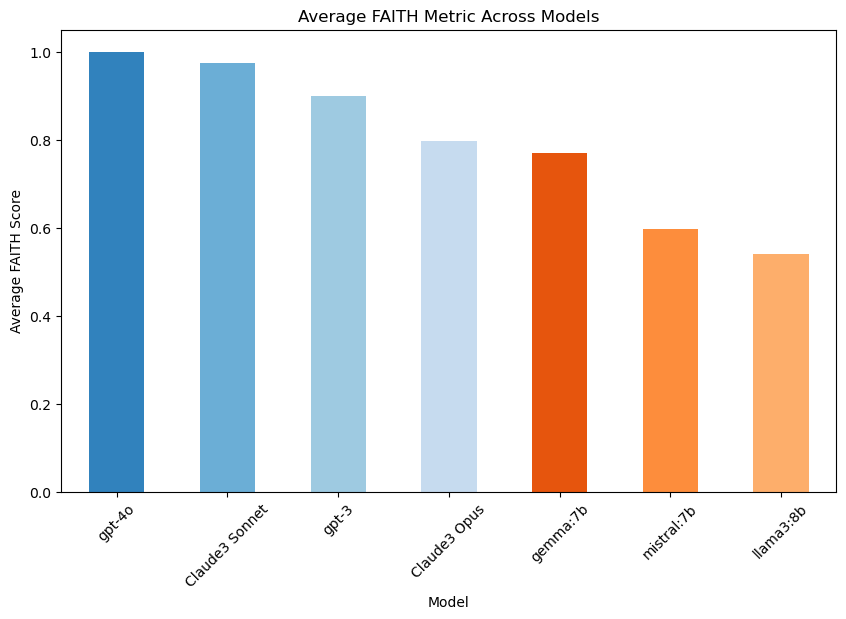

In [44]:
import matplotlib.pyplot as plt

faith_data = data[data['metric'] == 'FAITH']

faith_avg = faith_data.groupby('model')['avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c(range(len(faith_avg)))
faith_avg.plot(kind='bar', color=colors)
plt.title('Average FAITH Metric Across Models')
plt.xlabel('Model')
plt.ylabel('Average FAITH Score')
plt.xticks(rotation=45)
plt.show()



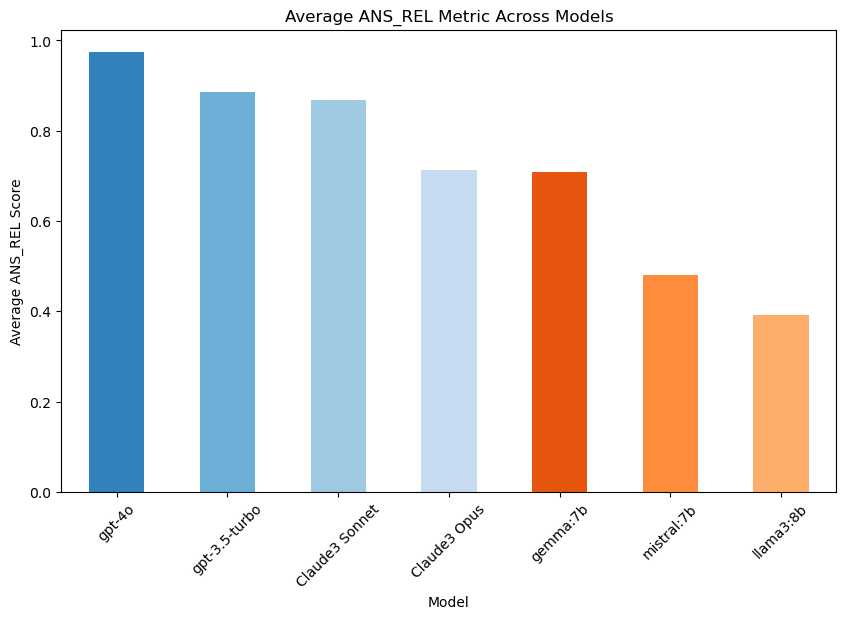

In [49]:
ans_rel_data = data[data['metric'] == 'ANS_REL']

ans_rel_avg = ans_rel_data.groupby('model')['avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c(range(len(ans_rel_avg)))
ans_rel_avg.plot(kind='bar', color=colors)
plt.title('Average ANS_REL Metric Across Models')
plt.xlabel('Model')
plt.ylabel('Average ANS_REL Score')
plt.xticks(rotation=45)
plt.show()


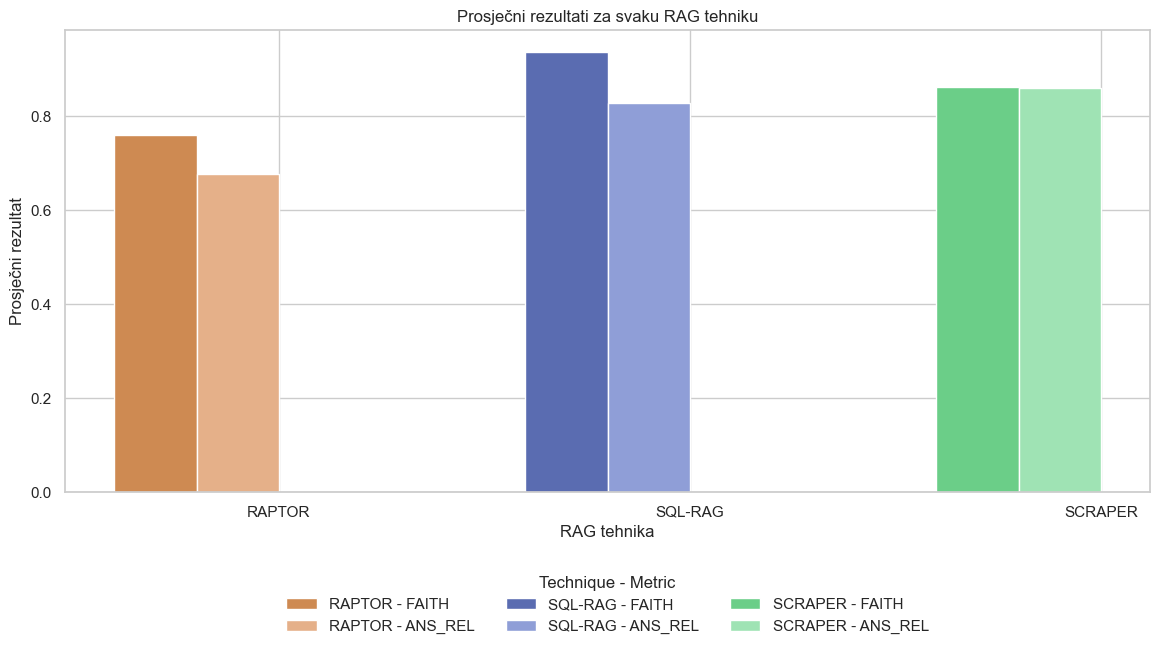

In [92]:
# Define custom colors for the RAG techniques with specified colors and lighter variations
technique_colors = {
    'RAPTOR': {'FAITH': '#CE8A52', 'OTHER': '#E5B089'},  # Dark and light orange
    'SQL-RAG': {'FAITH': '#5A6CB1', 'OTHER': '#8F9ED7'},  # Dark and light blue
    'SCRAPER': {'FAITH': '#6BCE88', 'OTHER': '#9FE3B4'}  # Dark and light green
}

# Define the plot size with reduced height
plt.figure(figsize=(14, 6))

# Store the bars for the legend
bars = {key: [] for key in technique_colors.keys()}

# Plot data for each metric
for i, metric in enumerate(metrics):
    subset = rag_data[rag_data['metric'] == metric]
    for j, technique in enumerate(rag_techniques):
        technique_data = subset[subset['rag_technique'] == technique]
        avg_score = technique_data['avg'].mean()
        color_key = 'FAITH' if metric == 'FAITH' else 'OTHER'
        bar = plt.bar([j + (i * 0.2)], avg_score, width=0.2, color=technique_colors[technique][color_key])
        bars[technique].append(bar[0])

# Customize the plot
plt.title('Prosječni rezultati za svaku RAG tehniku')
plt.xlabel('RAG tehnika')
plt.ylabel('Prosječni rezultat')
plt.xticks([x + 0.3 for x in range(len(rag_techniques))], rag_techniques)
plt.legend([bars['RAPTOR'][0], bars['RAPTOR'][1], bars['SQL-RAG'][0], bars['SQL-RAG'][1], bars['SCRAPER'][0], bars['SCRAPER'][1]], 
           ['RAPTOR - FAITH', 'RAPTOR - ANS_REL', 'SQL-RAG - FAITH', 'SQL-RAG - ANS_REL', 'SCRAPER - FAITH', 'SCRAPER - ANS_REL'], 
           title='Technique - Metric', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)
plt.show()


C:\Users\Luka\AppData\Local\Temp\ipykernel_28036\3520045889.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_per_question, x='question_label', y='avg', hue='metric', ci=None, ax=ax, palette=['#FF7F0E', '#1F77B4'])


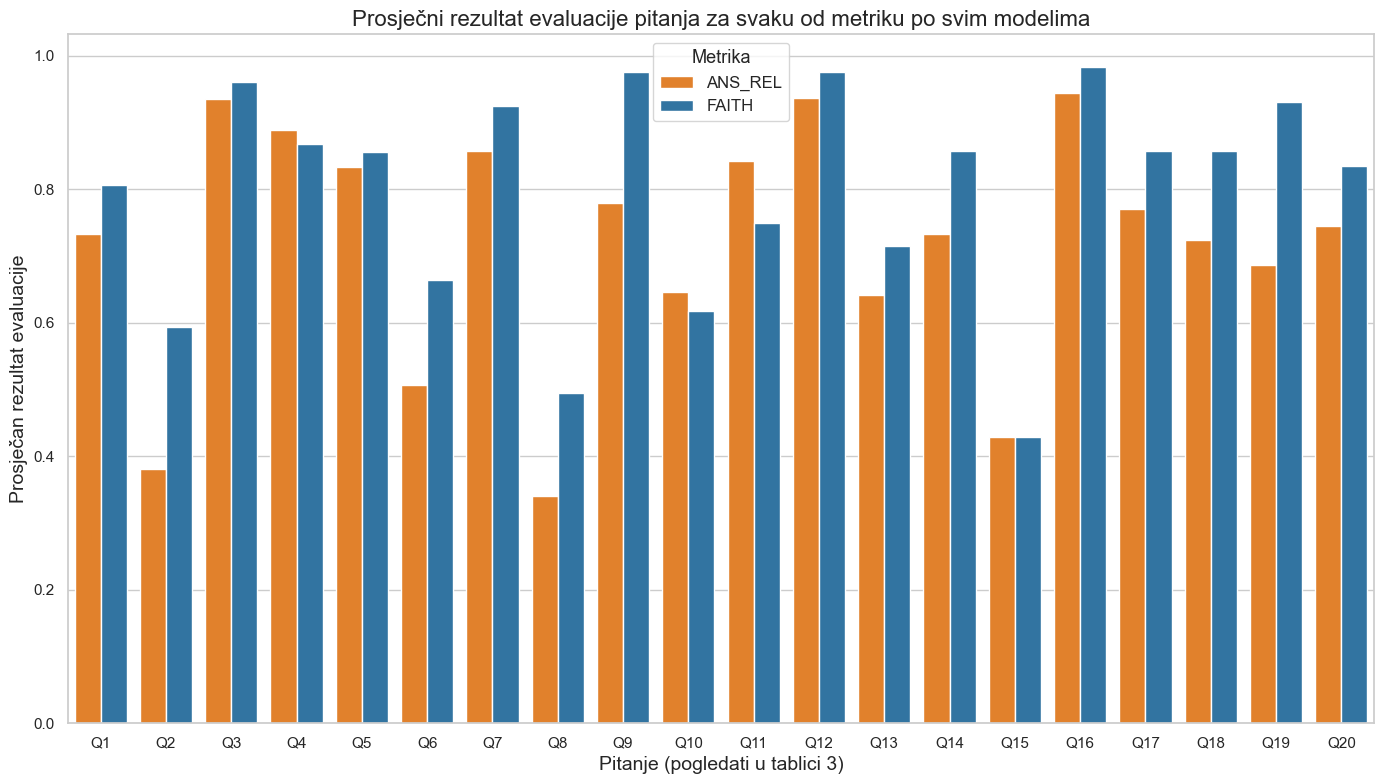

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'eval_results_transformed.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data['question_num'] = data.groupby('question').ngroup() + 1

avg_per_question = data.groupby(['question_num', 'model', 'metric']).mean(numeric_only=True).reset_index()

avg_per_question['question_label'] = 'Q' + avg_per_question['question_num'].astype(str)

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=avg_per_question, x='question_label', y='avg', hue='metric', ci=None, ax=ax, palette=['#FF7F0E', '#1F77B4'])

ax.set_title('Prosječni rezultat evaluacije pitanja za svaku od metriku po svim modelima', fontsize=16)
ax.set_xlabel('Pitanje (pogledati u tablici 3)', fontsize=14)
ax.set_ylabel('Prosječan rezultat evaluacije', fontsize=14)
ax.legend(title='Metrika', title_fontsize='13', fontsize='12')

plt.tight_layout()

plt.show()


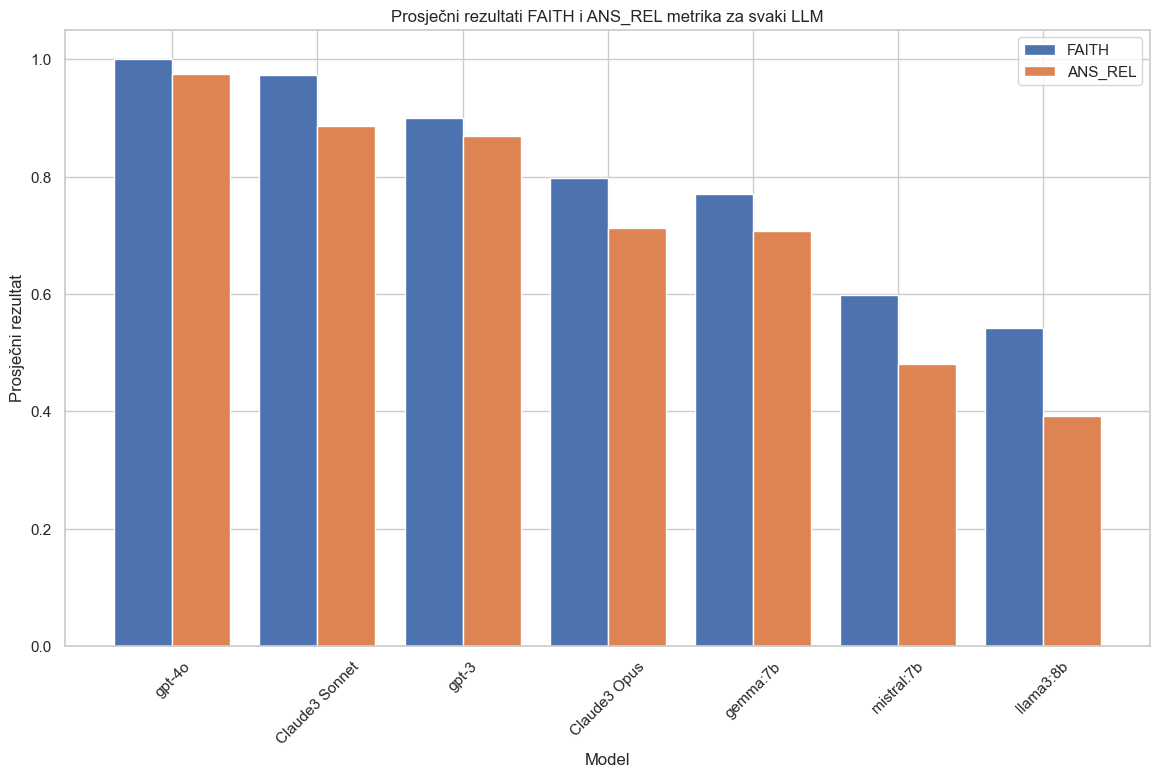

In [79]:
import matplotlib.pyplot as plt

# Filter data for FAITH and ANS_REL metrics
faith_data = data[data['metric'] == 'FAITH']
ans_rel_data = data[data['metric'] == 'ANS_REL']

faith_avg = faith_data.groupby('model')['avg'].mean().sort_values(ascending=False)
ans_rel_avg = ans_rel_data.groupby('model')['avg'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))

width = 0.4  # the width of the bars
x = range(len(faith_avg))

faith_bars = ax.bar(x, faith_avg, width, label='FAITH')

ans_rel_bars = ax.bar([p + width for p in x], ans_rel_avg, width, label='ANS_REL')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Prosječni rezultat')
ax.set_title('Prosječni rezultati FAITH i ANS_REL metrika za svaki LLM')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(faith_avg.index, rotation=45)
ax.legend()

# Show the plot
plt.show()